In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Salary_prediction/salary.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
X = iris.data[:, :1]  # Only first two features for visualization
y = iris.target

In [12]:
X.shape

(150, 1)

In [10]:
X1 = np.zeros((X.shape[0],2))
X2 = np.zeros((X.shape[0],2))

In [11]:
X1[:,0] = X[:,0]
X1[:,1] = X[:,0]**2

In [12]:
X2[:,0] = 5*X[:,0]
X2[:,1] = 5*X[:,0]**2

In [22]:
X1

array([[ 5.1 , 26.01],
       [ 4.9 , 24.01],
       [ 4.7 , 22.09],
       [ 4.6 , 21.16],
       [ 5.  , 25.  ],
       [ 5.4 , 29.16],
       [ 4.6 , 21.16],
       [ 5.  , 25.  ],
       [ 4.4 , 19.36],
       [ 4.9 , 24.01],
       [ 5.4 , 29.16],
       [ 4.8 , 23.04],
       [ 4.8 , 23.04],
       [ 4.3 , 18.49],
       [ 5.8 , 33.64],
       [ 5.7 , 32.49],
       [ 5.4 , 29.16],
       [ 5.1 , 26.01],
       [ 5.7 , 32.49],
       [ 5.1 , 26.01],
       [ 5.4 , 29.16],
       [ 5.1 , 26.01],
       [ 4.6 , 21.16],
       [ 5.1 , 26.01],
       [ 4.8 , 23.04],
       [ 5.  , 25.  ],
       [ 5.  , 25.  ],
       [ 5.2 , 27.04],
       [ 5.2 , 27.04],
       [ 4.7 , 22.09],
       [ 4.8 , 23.04],
       [ 5.4 , 29.16],
       [ 5.2 , 27.04],
       [ 5.5 , 30.25],
       [ 4.9 , 24.01],
       [ 5.  , 25.  ],
       [ 5.5 , 30.25],
       [ 4.9 , 24.01],
       [ 4.4 , 19.36],
       [ 5.1 , 26.01],
       [ 5.  , 25.  ],
       [ 4.5 , 20.25],
       [ 4.4 , 19.36],
       [ 5.

In [ ]:
poly = lambda x1,x2,Q=5: (1+x1@x2.T)**Q

In [17]:
clf_linear = SVC(kernel='poly')
clf_linear.fit(X1, y)

SVC(kernel='poly')

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [4]:
h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


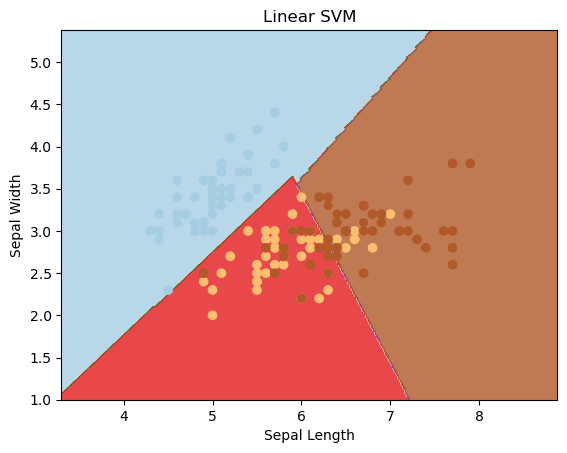

In [7]:
Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Linear SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

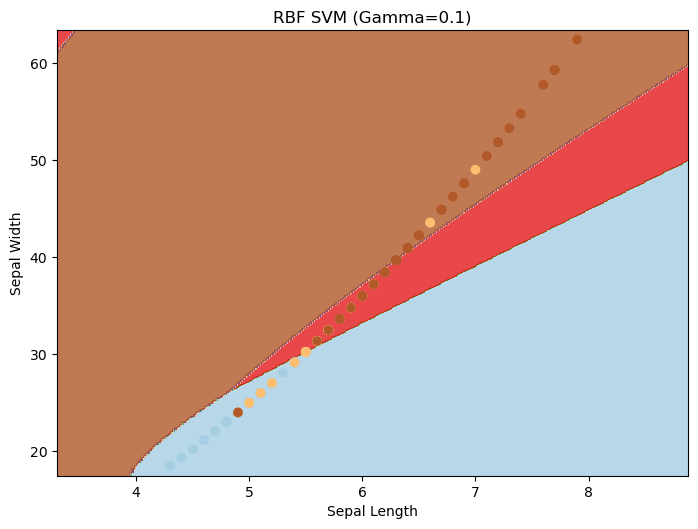

In [14]:
gamma_values = [0.1]
plt.figure(figsize=(20, 10))
for i, gamma in enumerate(gamma_values, 1):
    # Train SVM with RBF kernel
    clf_rbf = SVC(kernel='poly', gamma=gamma)
    clf_rbf.fit(X1, y)

    # Create a mesh to plot decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
    y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

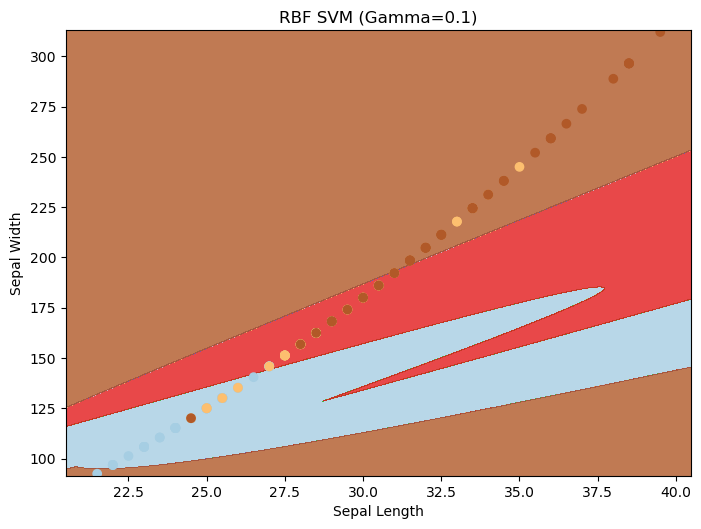

In [13]:
gamma_values = [0.1]
plt.figure(figsize=(20, 10))
for i, gamma in enumerate(gamma_values, 1):
    # Train SVM with RBF kernel
    clf_rbf = SVC(kernel='poly', gamma=gamma)
    clf_rbf.fit(X2, y)

    # Create a mesh to plot decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()